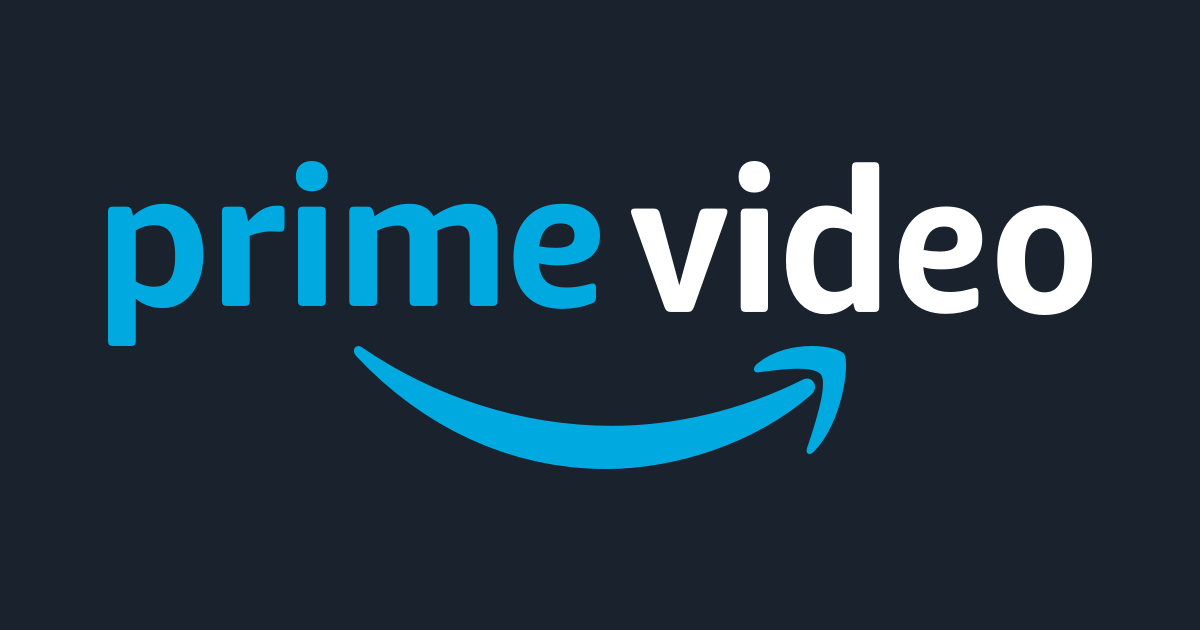

RGB color code: (0, 168, 225)

In [766]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [767]:
prime = pd.read_csv('amazon_titles.csv')

In [768]:
prime_credits = pd.read_csv('amazon_credits.csv')

In [769]:
prime.head()

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   
2               NaN       92   
3             TV-PG       19   
4               NaN      133   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   
2                     ['drama', 'romance', 'comedy']               ['US']   
3                               ['comedy', 'family']               ['US']   
4          ['western', 'drama', 'romance', 'action']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      NaN  tt0038650         8.6    467766.0           27.611       8.261  
1      NaN  tt0023969         7.8     60933.0            9.013       7.357  
2      NaN  tt0032599         7.8     60244.0           14.759       7.433  
3     26.0  tt0850645         8.5      1149.0           15.424       7.600  
4      NaN  tt0040724         7.8     32210.0           12.400       7.400

In [770]:
prime_df = prime.copy()

In [771]:
for i in prime.columns:
    null_rate = prime[i].isna().sum()/len(prime) *100
    if null_rate > 0 :
        print('{} null rate is {}%'.format(i, round(null_rate,2)))

description null rate is 1.32%
age_certification null rate is 66.08%
seasons null rate is 85.74%
imdb_id null rate is 6.45%
imdb_score null rate is 10.19%
imdb_votes null rate is 10.3%
tmdb_popularity null rate is 5.25%
tmdb_score null rate is 19.55%


In [772]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [773]:
round(prime_df.describe(),2)

release_year   runtime  seasons  imdb_score  imdb_votes  \
count      10873.00  10873.00  1551.00     9765.00     9753.00   
mean        2004.08     85.87     2.66        5.97     8973.23   
std           24.88     34.16     3.72        1.36    48977.67   
min         1912.00      0.00     1.00        1.10        5.00   
25%         2002.00     65.00     1.00        5.10      119.00   
50%         2015.00     89.00     1.00        6.10      488.00   
75%         2019.00    102.00     3.00        7.00     2493.00   
max         2023.00    940.00    53.00        9.90  2081757.00   

       tmdb_popularity  tmdb_score  
count         10302.00     8747.00  
mean              7.61        5.98  
std              45.85        1.51  
min               0.00        0.50  
25%               1.33        5.07  
50%               2.66        6.00  
75%               6.18        6.98  
max            3187.53       10.00

In [774]:
prime_df.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      NaN  tt0038650         8.6    467766.0           27.611       8.261  
1      NaN  tt0023969         7.8     60933.0            9.013       7.357

In [775]:
if len(prime_df[(prime_df['type'] == 'MOVIE') & prime_df['seasons'].isna()]) == prime_df['seasons'].isna().sum():
    print('1')
else:
    print('0')

1


This means that all the Na values in the season column are due to the type of content being a movie. Hence, if it is a movie, we should set 'seasons' to 0

In [776]:
prime_df['seasons'] = prime_df['seasons'].fillna('0')

In [12]:
# prime_df['genres'] = prime_df['genres'].apply(lambda x: x.strip("[ ","'","]").split(','))

In [13]:
# prime_df['genres'] = prime_df['genres'].apply(lambda x: [genre.strip("[]' ") for genre in x])

In [777]:
prime_df.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0       0  tt0038650         8.6    467766.0           27.611       8.261  
1       0  tt0023969         7.8     60933.0            9.013       7.357

In [15]:
# prime_df['primary_genre'] = prime_df['genres'].apply(lambda x: x.split(',')[0] if isinstance(x,str) else '')

In [778]:
prime_df['primary_genre'] = prime_df['genres'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [779]:
prime_df['primary_genre'] = prime_df['primary_genre'].str.replace("'", "")

In [780]:
prime_df['production_country'] = prime_df['production_countries'].apply(lambda x: x.strip("[ ").strip("]").split(",")[0])

In [781]:
prime_df['production_country'] = prime_df['production_country'].str.replace("'", "")

In [782]:
prime_df.production_country.unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'IT', 'MA',
       'HK', 'FR', 'JP', 'PR', 'ES', 'IE', 'PH', 'CH', 'RO', 'YU', 'KR',
       'TW', 'MC', 'IL', 'EG', 'RU', 'AU', 'NZ', 'AT', 'ZA', 'LI', 'BR',
       'DK', 'IR', 'PT', 'BE', 'FI', 'AR', 'NL', 'ID', 'VE', 'XC', 'NO',
       'BG', 'CN', 'TH', 'CL', 'LU', 'DO', 'CO', 'AE', 'PL', 'SK', 'JM',
       'IS', 'RS', 'CZ', 'SG', 'GR', 'HU', 'LT', 'UA', 'KZ', 'NG', 'UY',
       'MT', 'AF', 'TR', 'VN', 'KE', 'BO', 'GE', 'TT', 'BY', 'MY', 'PK',
       'PE', 'XK', 'TC', 'LB', 'NP', 'MN', 'NI', 'SB', 'CR', 'PA', 'UZ',
       'NA', 'KH', 'QA', 'CM', 'EE', 'CU', 'LV', 'SY', 'BM', 'IO', 'PF',
       'HN', 'TN', 'EC', 'BD', 'MK'], dtype=object)

In [22]:
# !pip install pycountry

In [23]:
# import pycountry

In [24]:
# abbreviated_countries = prime_df['production_country']

# full_countries = []
# for abbreviations in abbreviated_countries:
#     country_names = []
#     for abbreviation in abbreviations.strip("[]'").split(', '):
#         try:
#             country = pycountry.countries.get(alpha_2=abbreviation.strip())
#             if country is not None:
#                 country_names.append(country.name)
#         except KeyError:
#             pass
#     full_countries.append(country_names)

# print(full_countries)

In [783]:
prime_df.head(2)

id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [39]:
example = prime_df.description[0]

In [40]:
import nltk

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [42]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [43]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [44]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.38839525, 'roberta_neu': 0.45577946, 'roberta_pos': 0.15582532}


In [45]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [49]:
prime_df['description'] = prime_df['description'].astype(str)

In [51]:
# sample = prime_df.sample(n=1000, random_state=42)

In [56]:
res = {}
for i, row in tqdm(prime_df.iterrows(), total=len(prime_df)):
    try:
        text = row['description']
        myid = row['id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10873 [00:00<?, ?it/s]

Broke for id ts69050


In [784]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(prime_df, how='left')

In [785]:
results_df

id  roberta_neg  roberta_neu  roberta_pos  \
0        tm87233     0.388395     0.455779     0.155825   
1       tm143047     0.478866     0.495367     0.025767   
2        tm83884     0.267469     0.690081     0.042451   
3        ts20945     0.008699     0.744518     0.246783   
4         tm5012     0.052365     0.714091     0.233544   
...          ...          ...          ...          ...   
10867  tm1292884     0.591879     0.387385     0.020735   
10868  tm1284753     0.029325     0.875921     0.094754   
10869  tm1303380     0.074486     0.499936     0.425578   
10870  tm1307408     0.000682     0.013129     0.986189   
10871  tm1297385     0.101344     0.573179     0.325477   

                                    title   type  \
0                   It's a Wonderful Life  MOVIE   
1                               Duck Soup  MOVIE   
2                         His Girl Friday  MOVIE   
3                       The Three Stooges   SHOW   
4                               Red River  MOVIE   
...                                   ...    ...   
10867                                Hunt  MOVIE   
10868                  Ennalum Ente Aliya  MOVIE   
10869  Anubhav Singh Bassi: Bas Kar Bassi  MOVIE   
10870     Pinkfong! Summer in Wonderville  MOVIE   
10871                            Chapelle  MOVIE   

                                             description  release_year  \
0      A holiday favourite for generations...  George...          1946   
1      Rufus T. Firefly is named president/dictator o...          1933   
2      Hildy, the journalist former wife of newspaper...          1940   
3      The Three Stooges were an American vaudeville ...          1934   
4      Headstrong Thomas Dunson starts a thriving Tex...          1948   
...                                                  ...           ...   
10867  Arjun is the ACP of Hyderabad, who gets involv...          2023   
10868  It tells the story of a teen girl from a Musli...          2023   
10869  Fresh out of national law university, Bassi ar...          2023   
10870  It’s a hot summer day in Wonderville! Let’s jo...          2023   
10871  In the streets of North Paris, in a famous ghe...          2023   

      age_certification  runtime  \
0                    PG      130   
1                   NaN       69   
2                   NaN       92   
3                 TV-PG       19   
4                   NaN      133   
...                 ...      ...   
10867               NaN      129   
10868               NaN      113   
10869               NaN       83   
10870               NaN       47   
10871               NaN       72   

                                                  genres production_countries  \
0      ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                      ['comedy', 'war']               ['US']   
2                         ['drama', 'romance', 'comedy']               ['US']   
3                                   ['comedy', 'family']               ['US']   
4              ['western', 'drama', 'romance', 'action']               ['US']   
...                                                  ...                  ...   
10867                    ['action', 'thriller', 'crime']               ['IN']   
10868                                ['drama', 'comedy']               ['IN']   
10869                                         ['comedy']                   []   
10870                                                 []                   []   
10871                                          ['drama']                   []   

      seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  \
0           0   tt0038650         8.6    467766.0           27.611   
1           0   tt0023969         7.8     60933.0            9.013   
2           0   tt0032599         7.8     60244.0           14.759   
3        26.0   tt0850645         8.5      1149.0           15.424   
4           0   tt0040724         7

In [60]:
showtime = results_df.copy()

In [ ]:
# df['director'].replace(np.nan, 'No Data',inplace  = True)

In [61]:
showtime['age_certification'].replace(np.nan, 'No Data', inplace = True)

In [65]:
showtime['production_country'].replace('', 'No Data', inplace = True)

In [68]:
showtime['primary_genre'].replace('', 'No Data', inplace = True)

Now, based on the description of the content we know if it is positive, negative or neutral using the Roberta model from Hugging Face

In [69]:
showtime

id  roberta_neg  roberta_neu  roberta_pos  \
0        tm87233     0.388395     0.455779     0.155825   
1       tm143047     0.478866     0.495367     0.025767   
2        tm83884     0.267469     0.690081     0.042451   
3        ts20945     0.008699     0.744518     0.246783   
4         tm5012     0.052365     0.714091     0.233544   
...          ...          ...          ...          ...   
10867  tm1292884     0.591879     0.387385     0.020735   
10868  tm1284753     0.029325     0.875921     0.094754   
10869  tm1303380     0.074486     0.499936     0.425578   
10870  tm1307408     0.000682     0.013129     0.986189   
10871  tm1297385     0.101344     0.573179     0.325477   

                                    title   type  \
0                   It's a Wonderful Life  MOVIE   
1                               Duck Soup  MOVIE   
2                         His Girl Friday  MOVIE   
3                       The Three Stooges   SHOW   
4                               Red River  MOVIE   
...                                   ...    ...   
10867                                Hunt  MOVIE   
10868                  Ennalum Ente Aliya  MOVIE   
10869  Anubhav Singh Bassi: Bas Kar Bassi  MOVIE   
10870     Pinkfong! Summer in Wonderville  MOVIE   
10871                            Chapelle  MOVIE   

                                             description  release_year  \
0      A holiday favourite for generations...  George...          1946   
1      Rufus T. Firefly is named president/dictator o...          1933   
2      Hildy, the journalist former wife of newspaper...          1940   
3      The Three Stooges were an American vaudeville ...          1934   
4      Headstrong Thomas Dunson starts a thriving Tex...          1948   
...                                                  ...           ...   
10867  Arjun is the ACP of Hyderabad, who gets involv...          2023   
10868  It tells the story of a teen girl from a Musli...          2023   
10869  Fresh out of national law university, Bassi ar...          2023   
10870  It’s a hot summer day in Wonderville! Let’s jo...          2023   
10871  In the streets of North Paris, in a famous ghe...          2023   

      age_certification  runtime  \
0                    PG      130   
1               No Data       69   
2               No Data       92   
3                 TV-PG       19   
4               No Data      133   
...                 ...      ...   
10867           No Data      129   
10868           No Data      113   
10869           No Data       83   
10870           No Data       47   
10871           No Data       72   

                                                  genres production_countries  \
0      ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                      ['comedy', 'war']               ['US']   
2                         ['drama', 'romance', 'comedy']               ['US']   
3                                   ['comedy', 'family']               ['US']   
4              ['western', 'drama', 'romance', 'action']               ['US']   
...                                                  ...                  ...   
10867                    ['action', 'thriller', 'crime']               ['IN']   
10868                                ['drama', 'comedy']               ['IN']   
10869                                         ['comedy']                   []   
10870                                                 []                   []   
10871                                          ['drama']                   []   

      seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  \
0           0   tt0038650         8.6    467766.0           27.611   
1           0   tt0023969         7.8     60933.0            9.013   
2           0   tt0032599         7.8     60244.0           14.759   
3        26.0   tt0850645         8.5      1149.0           15.424   
4           0   tt0040724         7

In [70]:
showtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10872 entries, 0 to 10871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10872 non-null  object 
 1   roberta_neg           10872 non-null  float32
 2   roberta_neu           10872 non-null  float32
 3   roberta_pos           10872 non-null  float32
 4   title                 10872 non-null  object 
 5   type                  10872 non-null  object 
 6   description           10872 non-null  object 
 7   release_year          10872 non-null  int64  
 8   age_certification     10872 non-null  object 
 9   runtime               10872 non-null  int64  
 10  genres                10872 non-null  object 
 11  production_countries  10872 non-null  object 
 12  seasons               10872 non-null  object 
 13  imdb_id               10171 non-null  object 
 14  imdb_score            9764 non-null   float64
 15  imdb_votes         

## Done with data cleaning

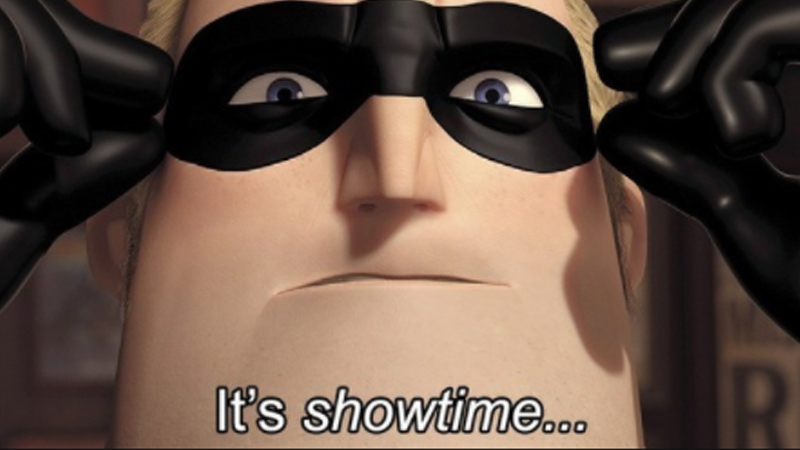

This notebook is inspired by Josh's Netflix Data Visualization notebook on Kaggle. Do check it out: https://www.kaggle.com/code/joshuaswords/netflix-data-visualization

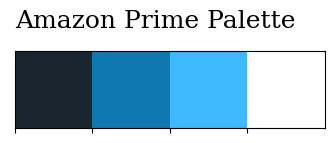

In [84]:
# Color Palette
sns.palplot(['#1b2530', '#0f79af','#3EB8FF','#ffffff'])

plt.title("Amazon Prime Palette ",loc='left',fontfamily='serif',fontsize=18,y=1.2)
plt.show()

In [71]:
showtime.head()

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   
2   tm83884     0.267469     0.690081     0.042451        His Girl Friday   
3   ts20945     0.008699     0.744518     0.246783      The Three Stooges   
4    tm5012     0.052365     0.714091     0.233544              Red River   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   
2  MOVIE  Hildy, the journalist former wife of newspaper...          1940   
3   SHOW  The Three Stooges were an American vaudeville ...          1934   
4  MOVIE  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   
2           No Data       92   
3             TV-PG       19   
4           No Data      133   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   
2                     ['drama', 'romance', 'comedy']               ['US']   
3                               ['comedy', 'family']               ['US']   
4          ['western', 'drama', 'romance', 'action']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   
2       0  tt0032599         7.8     60244.0           14.759       7.433   
3    26.0  tt0850645         8.5      1149.0           15.424       7.600   
4       0  tt0040724         7.8     32210.0           12.400       7.400   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US  
2         drama                 US  
3        comedy                 US  
4       western                 US

In [88]:
showtime.groupby('type').count()

id  roberta_neg  roberta_neu  roberta_pos  title  description  \
type                                                                     
MOVIE  9322         9322         9322         9322   9322         9322   
SHOW   1550         1550         1550         1550   1550         1550   

       release_year  age_certification  runtime  genres  production_countries  \
type                                                                            
MOVIE          9322               9322     9322    9322                  9322   
SHOW           1550               1550     1550    1550                  1550   

       seasons  imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
type                                                                           
MOVIE     9322     8742        8415        8406             8887        7544   
SHOW      1550     1429        1349        1346             1414        1203   

       primary_genre  production_country  
type                                      
MOVIE           9322                9322  
SHOW            1550                1550

In [91]:
x=showtime.groupby(['type'])['type'].count()
y=len(showtime)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

In [92]:
mf_ratio

type  MOVIE  SHOW
type   0.86  0.14

In [864]:
import plotly.graph_objects as go

# Compute the count for each content type
count_data = showtime['type'].value_counts()

# Create a horizontal bar chart
fig = go.Figure(data=go.Bar(
    y=count_data.index,
    x=count_data.values,
    orientation='h',
    marker=dict(color=['#1b2530', '#3EB8FF'])
))

# Set title and axis labels
fig.update_layout(
    title='Content on Amazon Prime Video',
    xaxis_title='Count',
    yaxis_title='Type of Content', title_x = 0.5
)

# Show the plot
fig.show()

For every 6 movies streaming on Amazon, there is 1 tv show.

In [121]:
# !pip install squarify

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [122]:
import squarify

In [800]:
top_countries = pd.DataFrame(showtime['production_country'].value_counts()[:10])
top_countries = top_countries.reset_index()
top_countries = top_countries[top_countries['index'] != 'No Data']
top_countries

index  production_country
0    US                5643
1    IN                1154
2    GB                 840
4    CA                 530
5    JP                 210
6    FR                 204
7    CN                 151
8    AU                 144
9    KR                 128

In [801]:
top_countries = top_countries.rename(columns = {
    'index' : 'production_country',
    'production_country' : 'content_produced'
})
top_countries

production_country  content_produced
0                 US              5643
1                 IN              1154
2                 GB               840
4                 CA               530
5                 JP               210
6                 FR               204
7                 CN               151
8                 AU               144
9                 KR               128

In [802]:
import pycountry

In [803]:
abbreviated_countries = top_countries['production_country']

full_countries = []
for abbreviations in abbreviated_countries:
    country_names = []
    for abbreviation in abbreviations.strip("[]'").split(', '):
        try:
            country = pycountry.countries.get(alpha_2=abbreviation.strip())
            if country is not None:
                country_names.append(country.name)
        except KeyError:
            pass
    full_countries.append(country_names)

print(full_countries)

[['United States'], ['India'], ['United Kingdom'], ['Canada'], ['Japan'], ['France'], ['China'], ['Australia'], ['Korea, Republic of']]


In [804]:
top_countries['country_name'] = full_countries

In [809]:
top_countries = top_countries[:4]

In [810]:
fig = px.pie(top_countries, values='content_produced', names='country_name',
             title='Contribution of Content Produced by Top 4 Countries on Amazon Prime Video')

# Change the color palette
fig.update_traces(marker=dict(colors=['#1b2530', '#0f79af', '#3EB8FF', '#f5f5f1','#ffffff']))

# Set the text position and information to be displayed
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

Amazon Prime Video is present in more than 200 countries of the world. Out of which, US is Amazon's largest market, followed by India and the United Kingdom. 

In [811]:
country_order = showtime['production_country'].value_counts()[:11].index
data = showtime[['type', 'production_country']].groupby('production_country')['type'].value_counts().unstack().loc[country_order]
data['sum'] = data.sum(axis=1)
data_ratio = (data.T / data['sum']).T[['MOVIE', 'SHOW']].sort_values(by='MOVIE',ascending=False)[::-1]
data_ratio = data_ratio.reset_index()

In [812]:
data_ratio = data_ratio[data_ratio['index'] != 'No Data']

In [813]:
data_ratio.rename(columns = {'index':'country_code'}, inplace = True)
data_ratio['MOVIE'] = round(data_ratio['MOVIE'], 2)
# data_ratio['MOVIE'] = (data_ratio['MOVIE'] * 100).astype(str) + '%'

In [814]:
data_ratio['SHOW'] = round(data_ratio['SHOW'],2)
data_ratio

type country_code  MOVIE  SHOW
0              CN   0.36  0.64
1              JP   0.46  0.54
2              KR   0.52  0.48
3              GB   0.71  0.29
4              AU   0.77  0.23
5              CA   0.85  0.15
6              IT   0.86  0.14
8              FR   0.86  0.14
9              US   0.90  0.10
10             IN   0.95  0.05

In [815]:
abbreviated_countries = data_ratio['country_code']

full_countries = []
for abbreviations in abbreviated_countries:
    country_names = []
    for abbreviation in abbreviations.strip("[]'").split(', '):
        try:
            country = pycountry.countries.get(alpha_2=abbreviation.strip())
            if country is not None:
                country_names.append(country.name)
        except KeyError:
            pass
    full_countries.append(country_names)

print(full_countries)

[['China'], ['Japan'], ['Korea, Republic of'], ['United Kingdom'], ['Australia'], ['Canada'], ['Italy'], ['France'], ['United States'], ['India']]


In [816]:
data_ratio['country_name'] = full_countries

In [817]:
data_ratio

type country_code  MOVIE  SHOW          country_name
0              CN   0.36  0.64               [China]
1              JP   0.46  0.54               [Japan]
2              KR   0.52  0.48  [Korea, Republic of]
3              GB   0.71  0.29      [United Kingdom]
4              AU   0.77  0.23           [Australia]
5              CA   0.85  0.15              [Canada]
6              IT   0.86  0.14               [Italy]
8              FR   0.86  0.14              [France]
9              US   0.90  0.10       [United States]
10             IN   0.95  0.05               [India]

In [869]:
fig = go.Figure()

# Add horizontal bar traces for MOVIE and SHOW
fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['MOVIE'],
    name='MOVIE',
    orientation='h',
    marker=dict(color='#1b2530'),
    text=(data_ratio['MOVIE'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

fig.add_trace(go.Bar(
    y=data_ratio.country_code,
    x=data_ratio['SHOW'],
    name='SHOW',
    orientation='h',
    marker=dict(color='#3EB8FF'),
    text=(data_ratio['SHOW'] * 100).astype(str) + '%',  # Add text as percentages
    textposition='inside',  # Set text position inside the bars
    textfont=dict(color='white')  # Set text color
))

# Set the layout
fig.update_layout(
    title="Amazon Prime Video's Content Distribution by Country",
    barmode='stack',
    yaxis_title='Top 10 Countries',
    xaxis=dict(showticklabels=False), title_x = 0.5 # Hide the x-axis tick labels
)

fig.show()

From top level analysis we know that, we watch more movies than tv shows. This chart helps us to further dig deeper into this information on a country.

In [819]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  ... seasons    imdb_id imdb_score imdb_votes  \
0                PG      130  ...       0  tt0038650        8.6   467766.0   
1           No Data       69  ...       0  tt0023969        7.8    60933.0   

   tmdb_popularity  tmdb_score  primary_genre  production_country sentiment  \
0           27.611       8.261          drama                  US  Positive   
1            9.013       7.357         comedy                  US  Positive   

  scaled_tmdb_pop  
0        0.436168  
1        0.030499  

[2 rows x 22 columns]

In [820]:
genre_distribution = pd.DataFrame(showtime.groupby('primary_genre')['type'].value_counts())
genre_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
genre_distribution['SUM'] = genre_distribution.sum(axis = 1)

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_57743/3203419532.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [821]:
genre_distribution.columns = ['primary_genre', 'MOVIE', 'SHOW', 'total']

In [822]:
genre_distribution = genre_distribution.sort_values('total', ascending = False)

In [870]:
fig = go.Figure()

# Add vertical bar traces for MOVIE and SHOW
fig.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#1b2530'),
#     text=df['MOVIE'].apply(lambda x: f'{x:.1f}%'),
#     textposition='auto'
))

fig.add_trace(go.Bar(
    x=genre_distribution['primary_genre'],
    y=genre_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#3EB8FF'),
#     text=df['SHOW'].apply(lambda x: f'{x:.1f}%'),
#     textposition='auto'
))

# fig.update_traces(textposition='inside', textinfo='percent+label')

# Set the layout
fig.update_layout(
    title="Amazon Prime Video's Content Distribution by Genre",
    xaxis_title='Genre',
    yaxis_title='Content on Amazon Prime Video',
    barmode='stack', legend_title = 'Type of Content', title_x =0.5
)

fig.show()

In [824]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  ... seasons    imdb_id imdb_score imdb_votes  \
0                PG      130  ...       0  tt0038650        8.6   467766.0   
1           No Data       69  ...       0  tt0023969        7.8    60933.0   

   tmdb_popularity  tmdb_score  primary_genre  production_country sentiment  \
0           27.611       8.261          drama                  US  Positive   
1            9.013       7.357         comedy                  US  Positive   

  scaled_tmdb_pop  
0        0.436168  
1        0.030499  

[2 rows x 22 columns]

In [825]:
rating_distribution = pd.DataFrame(showtime.groupby('age_certification')['type'].value_counts())
# rating_distribution = genre_distribution.unstack().reset_index().fillna(0).drop(0)
rating_distribution = rating_distribution.unstack().reset_index().fillna(0)
rating_distribution['SUM'] = rating_distribution.sum(axis = 1)
rating_distribution.columns = ['age_certification','MOVIE','SHOW','Total']

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_57743/2154306660.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [826]:
rating_distribution = rating_distribution.sort_values('Total', ascending = False).drop(2)

In [827]:
rating_distribution

age_certification   MOVIE   SHOW   Total
5                  R  1338.0    0.0  1338.0
4              PG-13   680.0    0.0   680.0
3                 PG   584.0    0.0   584.0
6              TV-14     0.0  249.0   249.0
0                  G   245.0    0.0   245.0
8              TV-MA     0.0  242.0   242.0
9              TV-PG     0.0  107.0   107.0
10              TV-Y     0.0   96.0    96.0
7               TV-G     0.0   68.0    68.0
11             TV-Y7     0.0   60.0    60.0
1              NC-17    14.0    0.0    14.0
12          TV-Y7-FV     0.0    5.0     5.0

In [871]:
fig = go.Figure()

# Add vertical bar traces for MOVIE and SHOW
fig.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['MOVIE'],
    name='MOVIE',
    marker=dict(color='#1b2530'),
#     text=df['MOVIE'].apply(lambda x: f'{x:.1f}%'),
#     textposition='auto'
))

fig.add_trace(go.Bar(
    x=rating_distribution['age_certification'],
    y=rating_distribution['SHOW'],
    name='SHOW',
    marker=dict(color='#3EB8FF'),
#     text=df['SHOW'].apply(lambda x: f'{x:.1f}%'),
#     textposition='auto'
))

# fig.update_traces(textposition='inside', textinfo='percent+label')

# Set the layout
fig.update_layout(
    title='Content Distribution by Age Rating Certification on Amazon Prime Video',
    xaxis_title='Genre',
    yaxis_title='Content on Amazon Prime Video',
    barmode='stack', legend_title = 'Type of Content', title_x = 0.5
)

fig.show()

In [829]:
history = pd.DataFrame(showtime.groupby('release_year')['type'].value_counts())
history = history.unstack().reset_index().fillna(0)
# history['total'] = history.sum(axis = 1)
history.columns = ['release_year','MOVIE','SHOW']
history = history[(history['release_year'] >= 2000) & (history['release_year'] <= 2021)]

In [830]:
history

release_year  MOVIE   SHOW
88           2000   68.0   10.0
89           2001   74.0   17.0
90           2002   71.0   12.0
91           2003   61.0   15.0
92           2004   93.0   15.0
93           2005   89.0   13.0
94           2006  101.0   26.0
95           2007  118.0   17.0
96           2008  156.0   27.0
97           2009  138.0   30.0
98           2010  162.0   36.0
99           2011  197.0   47.0
100          2012  226.0   46.0
101          2013  290.0   63.0
102          2014  335.0   56.0
103          2015  312.0   77.0
104          2016  443.0   77.0
105          2017  516.0  102.0
106          2018  646.0  111.0
107          2019  757.0  107.0
108          2020  728.0  150.0
109          2021  958.0  181.0

In [872]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['MOVIE'],
    mode='lines',
    name='MOVIE',
    fill='tozeroy',
    line=dict(color='#1b2530')
))

fig3.add_trace(go.Scatter(
    x=history['release_year'],
    y=history['SHOW'],
    mode='lines',
    name='SHOW',
    fill='tozeroy',
    line=dict(color='#3EB8FF')
))

# Set the layout
fig3.update_layout(
    title='Content Trend on Amazon Prime Video over the Years',
    xaxis_title='Release Year',
    yaxis_title='Content on Amazon Prime Video', showlegend = True, title_x =0.5
)
fig3.show()

In [535]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [833]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [834]:
demographic_data = showtime.copy()

In [835]:
demographic_data['target_ages'] = demographic_data['age_certification'].map(ratings_ages)

In [836]:
demographic_data = demographic_data.dropna()

In [837]:
demographic_data.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0  tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
3  ts20945     0.008699     0.744518     0.246783      The Three Stooges   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
3   SHOW  The Three Stooges were an American vaudeville ...          1934   

  age_certification  runtime  ...    imdb_id imdb_score imdb_votes  \
0                PG      130  ...  tt0038650        8.6   467766.0   
3             TV-PG       19  ...  tt0850645        8.5     1149.0   

  tmdb_popularity  tmdb_score  primary_genre  production_country  sentiment  \
0          27.611       8.261          drama                  US   Positive   
3          15.424       7.600         comedy                  US    Neutral   

  scaled_tmdb_pop target_ages  
0        0.436168  Older Kids  
3        0.170339  Older Kids  

[2 rows x 23 columns]

In [838]:
# demographic_data.groupby('production_country','target_ages')[['production_country','target_ages']].sum()
demographic_data = demographic_data.groupby(['production_country', 'target_ages']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]
demographic_data

production_country target_ages  count
156                 US      Adults    945
159                 US       Teens    461
158                 US  Older Kids    367
157                 US        Kids    165
60                  GB      Adults    136
63                  GB       Teens    104
21                  CA      Adults     84
79                  IN  Older Kids     70
23                  CA  Older Kids     56
62                  GB  Older Kids     52
78                  IN        Kids     50
24                  CA       Teens     50
93                  JP       Teens     42
80                  IN       Teens     41
56                  FR      Adults     38
22                  CA        Kids     32
90                  JP      Adults     28
58                  FR  Older Kids     22
61                  GB        Kids     22
104                 MX      Adults     21

In [839]:
import plotly.express as px

total_count = demographic_data['count'].sum()
demographic_data['percentage'] = (demographic_data['count'] / total_count) * 100

fig = px.treemap(demographic_data, path=['production_country', 'target_ages'], values='percentage',
                 color='target_ages', color_discrete_sequence=['#1b2530', '#0f79af', '#3EB8FF', '#ffffff'])

fig.update_layout(title= "Amazon Prime Video's Country-Level Target Audience",
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()

In [595]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [596]:
showtime['title'] = showtime['title'].astype(str)

In [597]:
title_corpus = ' '.join(showtime['title'])

In [598]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image

In [599]:
stopwords = set(STOPWORDS)

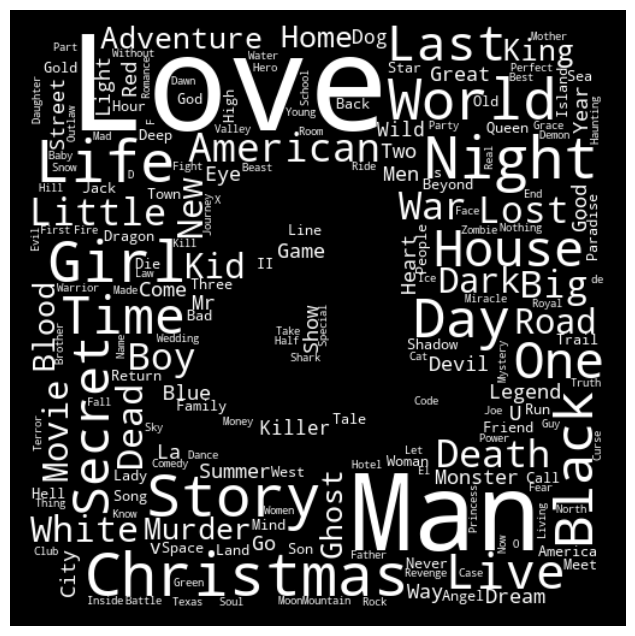

In [609]:
# Define a function to specify the text color
def amazon_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#ffffff"

custom_mask = np.array(Image.open('logo.jpg')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = amazon_color)
#background_color = 'white',
wc.generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [612]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [840]:
demo_genre = showtime.groupby(['production_country', 'primary_genre']).size().reset_index(name='count').sort_values('count', ascending = False)[:20]

In [841]:
demo_genre = demo_genre[demo_genre['production_country']!='No Data']

In [873]:
import plotly.express as px

fig = px.treemap(demo_genre, path=['production_country', 'primary_genre'], values='count',
                 color='count', color_continuous_scale='Blues', hover_data=['count'])

fig.update_layout(title='Amazon Prime Video Content by Genre and Country',
                  margin=dict(l=20, r=20, t=40, b=20), title_x = 0.5)  # Adjust the margins as needed

fig.show()


In [621]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [874]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='type',
                 color_discrete_map={'MOVIE': '#1b2530', 'SHOW': '#3EB8FF'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x =0.5)

fig.show()

In [630]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [632]:
sample = showtime.sample(n=1000, random_state=42)

In [876]:
fig = px.scatter(sample, x='roberta_neg', y='roberta_pos', color='type',
                 color_discrete_map={'MOVIE': '#1b2530', 'SHOW': '#3EB8FF'},
                 hover_data=['title'])

fig.update_layout(title='Understanding the relationship between Roberta scores for content on Prime',
                  xaxis_title='Roberta Negative Score',
                  yaxis_title='Roberta Positive Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [635]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  \
0                PG      130   
1           No Data       69   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
1                                  ['comedy', 'war']               ['US']   

  seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0  tt0038650         8.6    467766.0           27.611       8.261   
1       0  tt0023969         7.8     60933.0            9.013       7.357   

  primary_genre production_country  
0         drama                 US  
1        comedy                 US

In [640]:
showtime['sentiment'] = showtime.apply(lambda row: 'Negative' if row['roberta_neg'] > 0.5 else ('Neutral' if row['roberta_neu'] > 0.5 else 'Positive'), axis=1)


In [641]:
showtime.head()

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   
2   tm83884     0.267469     0.690081     0.042451        His Girl Friday   
3   ts20945     0.008699     0.744518     0.246783      The Three Stooges   
4    tm5012     0.052365     0.714091     0.233544              Red River   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   
2  MOVIE  Hildy, the journalist former wife of newspaper...          1940   
3   SHOW  The Three Stooges were an American vaudeville ...          1934   
4  MOVIE  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  ... production_countries seasons    imdb_id  \
0                PG      130  ...               ['US']       0  tt0038650   
1           No Data       69  ...               ['US']       0  tt0023969   
2           No Data       92  ...               ['US']       0  tt0032599   
3             TV-PG       19  ...               ['US']    26.0  tt0850645   
4           No Data      133  ...               ['US']       0  tt0040724   

  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  primary_genre  \
0        8.6    467766.0           27.611       8.261          drama   
1        7.8     60933.0            9.013       7.357         comedy   
2        7.8     60244.0           14.759       7.433          drama   
3        8.5      1149.0           15.424       7.600         comedy   
4        7.8     32210.0           12.400       7.400        western   

  production_country sentiment  
0                 US  Positive  
1                 US  Positive  
2                 US   Neutral  
3                 US   Neutral  
4                 US   Neutral  

[5 rows x 21 columns]

In [663]:
sentiment_counts = showtime['sentiment'].value_counts()

# Create the donut chart trace
fig = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    hole=0.5,  # Set the hole parameter to create a donut chart
    marker=dict(colors=['#1b2530', '#0f79af', '#3EB8FF']),  # Set custom colors for the slices
    textinfo='label+percent',  # Display labels and percentages
    textposition='inside',  # Set the position of the labels inside the slice
)])

# Set the layout
fig.update_layout(
    title='Sentiment Distribution of Content on Amazon Prime Video',
    showlegend=True, title_x = 0.5, 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Amazon Prime Video', x=0.50, y=0.5, font_size=15, showarrow=False)]
)
fig.show()

In [877]:
fig = px.scatter(showtime, x='imdb_score', y='tmdb_score', color='sentiment',
                 color_discrete_map={'Negative': '#1b2530', 'Neutral': '#0f79af', 'Positive': '#3EB8FF'},
                 hover_data=['title'])

fig.update_layout(title='IMDb Score vs TMDB Score',
                  xaxis_title='IMDb Score',
                  yaxis_title='TMDB Score',
                  legend_title='Type', title_x = 0.5)

fig.show()

In [648]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  ... production_countries seasons    imdb_id  \
0                PG      130  ...               ['US']       0  tt0038650   
1           No Data       69  ...               ['US']       0  tt0023969   

  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  primary_genre  \
0        8.6    467766.0           27.611       8.261          drama   
1        7.8     60933.0            9.013       7.357         comedy   

  production_country sentiment  
0                 US  Positive  
1                 US  Positive  

[2 rows x 21 columns]

In [680]:
genre_sentiment = showtime.groupby(['primary_genre', 'sentiment']).size().reset_index(name='count')
genre_sentiment = genre_sentiment[genre_sentiment['primary_genre']!= 'No Data']
genre_sentiment = genre_sentiment.sort_values('count', ascending = False)

In [878]:
colors = ['#1b2530', '#0f79af', '#3EB8FF', '#ffffff']

fig = px.sunburst(genre_sentiment, path=['primary_genre', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Genre vs Sentiments on Amazon Prime Video', title_x = 0.5)

fig.show()

In [704]:
age_certificate_sentiment = showtime.groupby(['age_certification', 'sentiment']).size().reset_index(name='count')
age_certificate_sentiment = age_certificate_sentiment[age_certificate_sentiment['age_certification']!= 'No Data']
age_certificate_sentiment = age_certificate_sentiment.sort_values('count', ascending = False)

In [879]:
fig = px.sunburst(age_certificate_sentiment, path=['age_certification', 'sentiment'], values='count',
                  color_discrete_sequence=colors)

fig.update_layout(title='Rating vs Sentiments on Amazon Prime Video', title_x = 0.5)

fig.show()

In [702]:
showtime.head()

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   
2   tm83884     0.267469     0.690081     0.042451        His Girl Friday   
3   ts20945     0.008699     0.744518     0.246783      The Three Stooges   
4    tm5012     0.052365     0.714091     0.233544              Red River   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   
2  MOVIE  Hildy, the journalist former wife of newspaper...          1940   
3   SHOW  The Three Stooges were an American vaudeville ...          1934   
4  MOVIE  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  ... production_countries seasons    imdb_id  \
0                PG      130  ...               ['US']       0  tt0038650   
1           No Data       69  ...               ['US']       0  tt0023969   
2           No Data       92  ...               ['US']       0  tt0032599   
3             TV-PG       19  ...               ['US']    26.0  tt0850645   
4           No Data      133  ...               ['US']       0  tt0040724   

  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  primary_genre  \
0        8.6    467766.0           27.611       8.261          drama   
1        7.8     60933.0            9.013       7.357         comedy   
2        7.8     60244.0           14.759       7.433          drama   
3        8.5      1149.0           15.424       7.600         comedy   
4        7.8     32210.0           12.400       7.400        western   

  production_country sentiment  
0                 US  Positive  
1                 US  Positive  
2                 US   Neutral  
3                 US   Neutral  
4                 US   Neutral  

[5 rows x 21 columns]

In [706]:
showtime.tmdb_popularity.unique()

array([27.611,  9.013, 14.759, ...,  5.432,  4.403,  3.406])

In [712]:
from sklearn.preprocessing import StandardScaler

In [713]:
scaler = StandardScaler()

In [714]:
showtime['scaled_tmdb_pop'] = scaler.fit_transform(showtime[['tmdb_popularity']])

In [721]:
fig = px.violin(showtime, x='sentiment', y='scaled_tmdb_pop', color_discrete_sequence = colors)

# Set the layout
fig.update_layout(
    title='Violin Plot: Relationship between sentiments and tmdb popularity',
    xaxis_title='Sentiments',
    yaxis_title='TMDB Popularity'
)

fig.show()

In [723]:
showtime.scaled_tmdb_pop.unique()

array([ 0.43616823,  0.03049904,  0.15583377, ..., -0.04761158,
       -0.07005666, -0.09180374])

In [881]:
filter_showtime = showtime[(showtime['release_year'] >= 2010) & (showtime['release_year'] <= 2020)]

filter_showtime = filter_showtime.groupby(['release_year', 'sentiment']).size().reset_index(name='count')

colors = ['#1b2530', '#0f79af', '#3EB8FF', '#ffffff']

fig = px.area(filter_showtime, x='release_year', y='count', color='sentiment',
              color_discrete_sequence=colors,
              title='Trend of Content Released Over Time')

# Set the layout
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Content Streamed on Amazon Prime Video',
    legend_title='Sentiment', title_x = 0.5
)
fig.show()

In [747]:
showtime.head(2)

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   

  age_certification  runtime  ... seasons    imdb_id imdb_score imdb_votes  \
0                PG      130  ...       0  tt0038650        8.6   467766.0   
1           No Data       69  ...       0  tt0023969        7.8    60933.0   

   tmdb_popularity  tmdb_score  primary_genre  production_country sentiment  \
0           27.611       8.261          drama                  US  Positive   
1            9.013       7.357         comedy                  US  Positive   

  scaled_tmdb_pop  
0        0.436168  
1        0.030499  

[2 rows x 22 columns]

In [844]:
numeric_columns = showtime.select_dtypes(include=[int, float])
numeric_columns

roberta_neg  roberta_neu  roberta_pos  release_year  runtime  \
0         0.388395     0.455779     0.155825          1946      130   
1         0.478866     0.495367     0.025767          1933       69   
2         0.267469     0.690081     0.042451          1940       92   
3         0.008699     0.744518     0.246783          1934       19   
4         0.052365     0.714091     0.233544          1948      133   
...            ...          ...          ...           ...      ...   
10867     0.591879     0.387385     0.020735          2023      129   
10868     0.029325     0.875921     0.094754          2023      113   
10869     0.074486     0.499936     0.425578          2023       83   
10870     0.000682     0.013129     0.986189          2023       47   
10871     0.101344     0.573179     0.325477          2023       72   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  scaled_tmdb_pop  
0             8.6    467766.0           27.611       8.261         0.436168  
1             7.8     60933.0            9.013       7.357         0.030499  
2             7.8     60244.0           14.759       7.433         0.155834  
3             8.5      1149.0           15.424       7.600         0.170339  
4             7.8     32210.0           12.400       7.400         0.104378  
...           ...         ...              ...         ...              ...  
10867         5.8      1269.0            4.403       4.300        -0.070057  
10868         5.6       812.0            3.406       8.000        -0.091804  
10869         8.3        10.0            1.960         NaN        -0.123345  
10870         NaN         NaN            1.336         NaN        -0.136956  
10871         NaN         NaN              NaN         NaN              NaN  

[10872 rows x 10 columns]

In [851]:
colors = ['#1b2530', '#0f79af', '#3EB8FF', '#ffffff']

fig = px.histogram(showtime, x='runtime', color_discrete_sequence=colors, nbins = 50)

# Customize the layout if needed
fig.update_layout(
    title='Runtime Distribution of Content on Amazon Prime Video',
    xaxis_title='Runtime',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [852]:
colors = [ '#0f79af', '#3EB8FF', '#ffffff']

fig = px.histogram(showtime, x='seasons', color_discrete_sequence=colors, nbins = 50)

# Customize the layout if needed
fig.update_layout(
    title='Number of Seasons Distribution of Content on Amazon Prime Video',
    xaxis_title='Number of Seasons',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [853]:
colors = [ '#3EB8FF', '#ffffff']

fig = px.histogram(showtime, x='imdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='IMDB Score Distribution of Content on Amazon Prime Video',
    xaxis_title='IMDB Score',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [855]:
colors = [ '#3EB8FF', '#ffffff']

fig = px.histogram(showtime, x='tmdb_score', color_discrete_sequence=colors)

# Customize the layout if needed
fig.update_layout(
    title='TMDB Score Distribution of Content on Amazon Prime Video',
    xaxis_title='TMDB Score',
    yaxis_title='Count of Content', title_x = 0.5, bargap=0.2
)

fig.show()

In [858]:
showtime.head()

id  roberta_neg  roberta_neu  roberta_pos                  title  \
0   tm87233     0.388395     0.455779     0.155825  It's a Wonderful Life   
1  tm143047     0.478866     0.495367     0.025767              Duck Soup   
2   tm83884     0.267469     0.690081     0.042451        His Girl Friday   
3   ts20945     0.008699     0.744518     0.246783      The Three Stooges   
4    tm5012     0.052365     0.714091     0.233544              Red River   

    type                                        description  release_year  \
0  MOVIE  A holiday favourite for generations...  George...          1946   
1  MOVIE  Rufus T. Firefly is named president/dictator o...          1933   
2  MOVIE  Hildy, the journalist former wife of newspaper...          1940   
3   SHOW  The Three Stooges were an American vaudeville ...          1934   
4  MOVIE  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  ... seasons    imdb_id imdb_score imdb_votes  \
0                PG      130  ...       0  tt0038650        8.6   467766.0   
1           No Data       69  ...       0  tt0023969        7.8    60933.0   
2           No Data       92  ...       0  tt0032599        7.8    60244.0   
3             TV-PG       19  ...    26.0  tt0850645        8.5     1149.0   
4           No Data      133  ...       0  tt0040724        7.8    32210.0   

   tmdb_popularity  tmdb_score  primary_genre  production_country sentiment  \
0           27.611       8.261          drama                  US  Positive   
1            9.013       7.357         comedy                  US  Positive   
2           14.759       7.433          drama                  US   Neutral   
3           15.424       7.600         comedy                  US   Neutral   
4           12.400       7.400        western                  US   Neutral   

  scaled_tmdb_pop  
0        0.436168  
1        0.030499  
2        0.155834  
3        0.170339  
4        0.104378  

[5 rows x 22 columns]

In [859]:
# amazon_credits.csv
prime_credits

person_id         id              name                      character  \
0           25020    tm87233     James Stewart                  George Bailey   
1           26190    tm87233        Donna Reed                     Mary Hatch   
2           25653    tm87233  Lionel Barrymore                     Mr. Potter   
3           13301    tm87233   Thomas Mitchell                    Uncle Billy   
4           34171    tm87233     Henry Travers                       Clarence   
...           ...        ...               ...                            ...   
140548    2616047  tm1307408    Barri Tsavaris    Jeni / Poki / Jojo / Chumli   
140549    2030678  tm1307408        Park Yerin                   Frido / Tani   
140550    1378851  tm1307408        Bommie Han      Pinkfong / Rachel / Jordi   
140551    2762736  tm1307408   Sharon Youngmee                  Billi / Baker   
140552    2724813  tm1307408        Sarah Bock  Coco / Quacki / Shasha / Nina   

         role  
0       ACTOR  
1       ACTOR  
2       ACTOR  
3       ACTOR  
4       ACTOR  
...       ...  
140548  ACTOR  
140549  ACTOR  
140550  ACTOR  
140551  ACTOR  
140552  ACTOR  

[140553 rows x 5 columns]

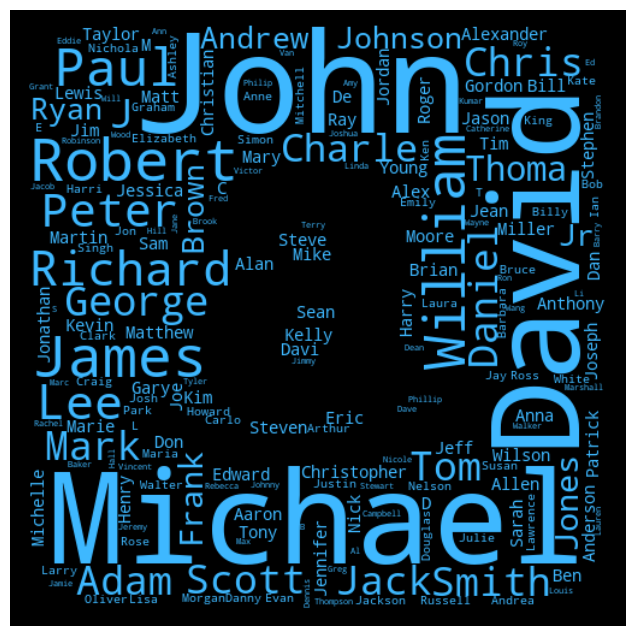

In [882]:
# most popular actor on amazon prime
prime_credits['name'] = prime_credits['name'].astype(str)
name_corpus = ' '.join(prime_credits['name'])

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load our image
stopwords = set(STOPWORDS)

# Define a function to specify the text color
def amazon_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#3EB8FF"

custom_mask = np.array(Image.open('logo.jpg')) 
wc = WordCloud(
               stopwords = stopwords,
               mask = custom_mask,height = 2000, width = 4000, color_func = amazon_color)
#background_color = 'white',
wc.generate(name_corpus)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [863]:
row = prime_credits.loc[140552]
print(row)


person_id                          2724813
id                               tm1307408
name                            Sarah Bock
character    Coco / Quacki / Shasha / Nina
role                                 ACTOR
Name: 140552, dtype: object
